In this homework, you can pick one of the two sections (Automated Fact-checking or Relatio) to get the full completion point.

# Automated Fact-checking
In the notebook, we see one off-the-shelf fact-check model based on RoBERTa.
However, that setting is more like textual entailment. Real-world Fact-checking pipeline requires an extra module: evidence retrieval. In this homework, we will add an evidence retrieval model based on <b>sentence-bert</b> to the RoBERTa Fact-checker.

Note: SBERT was introduced in Notebook 6 (06_transformers.ipynb).

In [ ]:
!wget https://scifact.s3-us-west-2.amazonaws.com/release/latest/data.tar.gz
!tar -xzf data.tar.gz

--2023-05-15 19:34:49--  https://scifact.s3-us-west-2.amazonaws.com/release/latest/data.tar.gz
Resolving scifact.s3-us-west-2.amazonaws.com (scifact.s3-us-west-2.amazonaws.com)... 52.218.204.153, 52.92.193.50, 52.92.225.202, ...
Connecting to scifact.s3-us-west-2.amazonaws.com (scifact.s3-us-west-2.amazonaws.com)|52.218.204.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3115079 (3.0M) [application/x-tar]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]   2.97M  2.61MB/s    in 1.1s    

2023-05-15 19:34:51 (2.61 MB/s) - ‘data.tar.gz’ saved [3115079/3115079]



In [ ]:
import json

claim_file = 'data/claims_dev.jsonl'
corpus_file = 'data/corpus.jsonl'

corpus = {}
with open(corpus_file) as f:
    for line in f:
        abstract = json.loads(line)
        corpus[str(abstract["doc_id"])] = abstract
        
claims = []
with open(claim_file) as f:
    for line in f:
        claim = json.loads(line)
        claims.append(claim)

print(claims[1])
print(corpus['14717500'])

print("Number of Corpus: ", len(corpus))

{'id': 3, 'claim': '1,000 genomes project enables mapping of genetic sequence variation consisting of rare variants with larger penetrance effects than common variants.', 'evidence': {'14717500': [{'sentences': [2, 5], 'label': 'SUPPORT'}, {'sentences': [7], 'label': 'SUPPORT'}]}, 'cited_doc_ids': [14717500]}
{'doc_id': 14717500, 'title': 'Rare Variants Create Synthetic Genome-Wide Associations', 'abstract': ['Genome-wide association studies (GWAS) have now identified at least 2,000 common variants that appear associated with common diseases or related traits (http://www.genome.gov/gwastudies), hundreds of which have been convincingly replicated.', 'It is generally thought that the associated markers reflect the effect of a nearby common (minor allele frequency >0.05) causal site, which is associated with the marker, leading to extensive resequencing efforts to find causal sites.', 'We propose as an alternative explanation that variants much less common than the associated one may crea

In [ ]:
#!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm


def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# utility function for cosine similarity calculation
def cosine_similarity_matrix(vector, matrix):
    return np.apply_along_axis(cosine_similarity, 1, matrix, vector)

# preprocessing function for SciFact corpus
def preprocess_sentence(text):
    text = text.replace('/', ' / ')
    text = text.replace('.-', ' .- ')
    text = text.replace('.', ' . ')
    text = text.replace('\'', ' \' ')
    text = text.lower()

    return text

### TODO 1: find the top-10 evidences for the following claim USING SBERT.

In [ ]:
claim_1 = claims[1]['claim']

corpus_ids, corpus_texts = [], []
for k, v in corpus.items():
  original_sentences = [v['title']] + v['abstract']
  processed_paragraph = " ".join([preprocess_sentence(sentence) for sentence in original_sentences])
  corpus_ids.append(k)
  corpus_texts.append(processed_paragraph)

# TODO: find the top-10 evidences for claim_1 using SBERT
# Hint 1: use Colab's GPU (or your local GPUs) to accelerate SBERT Encoding
# Hint 2: use parallel encoding (i.e. batch encoding) from SBERT to accelerate encoding.
# Hint 3: SciFact is a scientific domain dataset. Are there SBERT models on the same domain?



Batches:   0%|          | 0/162 [00:00<?, ?it/s]

['1388704',
 '23389795',
 '2739854',
 '8690595',
 '15153602',
 '4378885',
 '1067605',
 '10944947',
 '14717500',
 '1544804']

### TODO 2: use Dzeniks/roberta-fact-check and the retrieved evidence to verify the claim. You can use one or multiple evidence.

In [ ]:
#!pip install transformers
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

In [ ]:
# TODO: use Dzeniks/roberta-fact-check and the retrieved evidence to verify the claim. You can use one or multiple evidence.


Label: 1


# Relatio

In [1]:
!pip install relatio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.0 MB/s eta 0:00:00


In [2]:
# Catch warnings for an easy ride
from relatio import FileLogger
logger = FileLogger(level = 'WARNING')

In [3]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["doc"] = df["title"] + " " + df["lead"]
df["id"] = df.index
df = df[['id', 'doc']]
df.head()

df = df.sample(n=5000)

--2023-05-25 11:24:39--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.08s   

2023-05-25 11:24:40 (366 MB/s) - ‘train.csv’ saved [29470338/29470338]



### TODO 1: Predict the Semantic Roles in the AG news dataset. 

In [5]:
from relatio import Preprocessor, SRL, extract_roles

p = Preprocessor(
    spacy_model = "en_core_web_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100
)

df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

  warnings.warn(warn_msg)



Splitting into sentences...


100%|██████████| 5000/5000 [00:22<00:00, 226.87it/s]


In [6]:
# TODO 1: Predict the Semantic Role Labels in the AG news dataset.
# Hint: you can sample a few sentences to accelerate SRL prediction.

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device = -1
)

srl_res = SRL(df['sentence'][0:1000], progress_bar=True)

from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res, 
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

  warnings.warn(warn_msg)



Running SRL...


100%|██████████| 100/100 [03:42<00:00,  2.22s/it]


Extracting semantic roles...


100%|██████████| 1000/1000 [00:00<00:00, 8386.34it/s]

{'ARG0': 'Greene within sight of two big marks South Gwinnett grad David Greene', 'B-V': 'needs', 'ARG1': 'just one more win'}
{'ARG0': 'ATHENS - David Greene', 'B-V': 'heres', 'ARG1': 'one he can embrace'}
{'ARG0': 'he', 'B-V': 'embrace', 'B-ARGM-MOD': 'can', 'ARG1': 'heres one'}
{'ARG0': 'Joe Gibbs', 'B-V': 'looks', 'ARG1': 'like less than an immediate savior'}
{'ARG0': 'Dan Snyder', 'B-V': 'wondering', 'ARG1': 'what went wrong and what to do now'}
{'ARG0': 'Myanmar army strongman', 'B-V': 'meet', 'ARG1': 'Indian premier'}
{'ARG0': 'Myanmar army strongman', 'B-V': 'visit', 'ARG1': 'NEW DELHI'}
{'ARG0': 'Myanmar army strongman General Than Shwe', 'B-V': 'meet', 'ARG1': 'Indian premier Manmohan Singh , leader of the world # 39;s biggest democracy ,'}
{'ARG0': 'the neighbouring nations', 'B-V': 'sought', 'ARG1': 'stronger ties'}
{'ARG0': 'The 57 - year - old', 'B-V': 'quit', 'ARG1': 'south coast rivals Portsmouth'}
{'ARG0': 'The 57 - year - old quit south coast rivals Portsmouth', 'B-V'

### TODO 2: Postprocess the retrieved semantic roles


In [10]:
# TODO 2: Postprocess the retrieved semantic roles
# Hint: use p.process_roles

!mkdir output
postproc_roles = p.process_roles(roles, 
                  max_length = 50,
                  progress_bar = True,
                  output_path = './output/postproc_roles.json')


Cleaning phrases for role ARG0...


100%|██████████| 2009/2009 [00:07<00:00, 282.70it/s]


Cleaning phrases for role B-V...


100%|██████████| 2009/2009 [00:07<00:00, 265.03it/s]


Cleaning phrases for role B-ARGM-MOD...


100%|██████████| 141/141 [00:01<00:00, 136.10it/s]


Cleaning phrases for role ARG1...


100%|██████████| 1939/1939 [00:09<00:00, 213.09it/s]


Cleaning phrases for role ARG2...


100%|██████████| 311/311 [00:01<00:00, 225.01it/s]


In [11]:
for d in postproc_roles[0:20]: 
  print(d)

{'B-V': 'need', 'ARG1': 'just one more win'}
{'ARG0': 'athens david greene', 'B-V': 'here', 'ARG1': 'one he can embrace'}
{'ARG0': 'he', 'B-V': 'embrace', 'B-ARGM-MOD': 'can', 'ARG1': 'here one'}
{'ARG0': 'joe gibbs', 'B-V': 'look', 'ARG1': 'like less than an immediate savior'}
{'ARG0': 'dan snyder', 'B-V': 'wonder', 'ARG1': 'what go wrong and what to do now'}
{'ARG0': 'myanmar army strongman', 'B-V': 'meet', 'ARG1': 'indian premier'}
{'ARG0': 'myanmar army strongman', 'B-V': 'visit', 'ARG1': 'new delhi'}
{'ARG0': 'myanmar army strongman general than shwe', 'B-V': 'meet'}
{'ARG0': 'the neighbouring nation', 'B-V': 'seek', 'ARG1': 'strong tie'}
{'ARG0': 'the year old', 'B-V': 'quit', 'ARG1': 'south coast rival portsmouth'}
{'ARG0': 'the year old quit south coast rival portsmouth', 'B-V': 'claim', 'ARG1': 'he need a break from the game'}
{'ARG0': 'he', 'B-V': 'need', 'ARG1': 'a break from the game'}
{'ARG0': 'bbc radio five live', 'B-V': 'report'}
{'ARG0': 'redknapp', 'B-V': 'confirm', '

### TODO 3: Extract the named entities that can be recognized from the semantic roles.

In [12]:
# TODO 3: Extract the named entities that can be recognized from the semantic roles.
# Hint use p.mine_entities

known_entities = p.mine_entities(
    df['sentence'], 
    clean_entities = True, 
    progress_bar = True,
    output_path = './output/entities.pkl'
)

for n in known_entities.most_common(10): print(n)

Mining named entities...


100%|██████████| 6486/6486 [00:42<00:00, 150.86it/s]

('reuters', 647)
('ap', 522)
('us', 421)
('iraq', 221)
('u s', 218)
('new york', 178)
('microsoft', 173)
('china', 133)
('washington', 120)
('bush', 113)


In [13]:
top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

### TODO 4: modeling the narratives

In [14]:
from relatio.narrative_models import NarrativeModel

# TODO 4: modeling the narratives using NarrativeModel
# Hint: follow the notebook's hyperparameter setting

m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)    
             
m.fit(postproc_roles, progress_bar = True) 

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Computing phrase embeddings...


100%|██████████| 1208/1208 [00:16<00:00, 72.54it/s]


Computing phrase embeddings...


100%|██████████| 1255/1255 [00:18<00:00, 69.20it/s]


Computing phrase embeddings...


100%|██████████| 2374/2374 [00:34<00:00, 69.59it/s] 


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}


  warnings.warn(



Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}
Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [2, 5, 11, 16, 23], 'random_state': 0}


  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



The silhouette score suggests the optimal number of clusters is 23. This corresponds to index 4.
The elbow method (inertia score) suggests the optimal number of clusters is 5. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


In [17]:
m.clusters_to_txt(path = './output/clusters.txt')

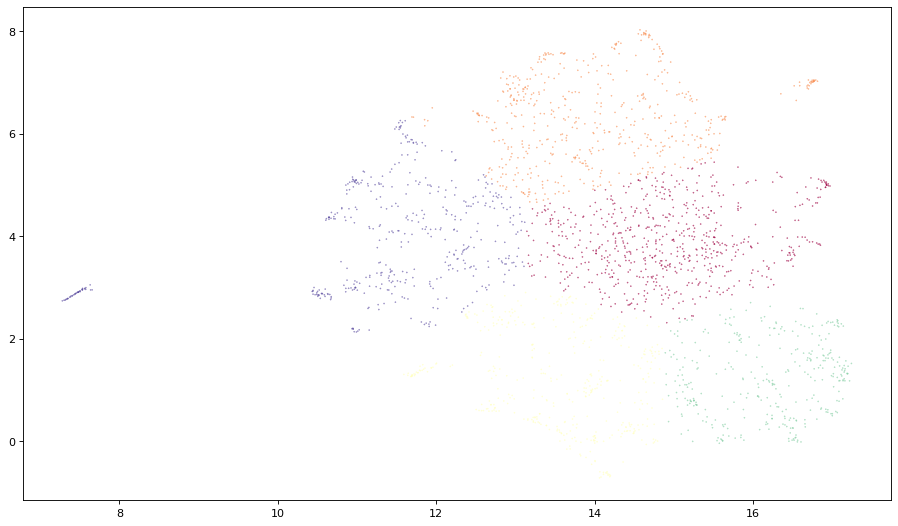

In [16]:
m.plot_clusters(path = './clusters.pdf')